# Úkol č. 1 - předzpracování dat a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzašším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s klasifikační úlohou s příznaky různých typů.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:
* survived - zda pasažér přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
    * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména atp.
    * Některé příznaky můžete také úplně zahodit.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace a vše stručně ale náležitě komentujte.

  
  * Na připravená data postupně aplikujte **rozhodovací strom** a **metodu nejbližších sousedů**, přičemž pro každý z těchto modelů:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty.
    * Pro model s nejlepšími hodnotami hyperparametrů spočtěte F1 skóre, nakreslete ROC křivku a určete AUC. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.

        
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **survived**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,survived
1000,0
1001,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

In [24]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read data from data.csv:


In [25]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        802 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      233 non-null    object 
 11  embarked   998 non-null    object 
 12  home.dest  566 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


Give all missing values NaN value:

In [26]:
data = data.replace('?', np.nan)
data.isnull().sum(axis=0)

ID             0
survived       0
pclass         0
name           0
sex            0
age          198
sibsp          0
parch          0
ticket         0
fare           1
cabin        767
embarked       2
home.dest    434
dtype: int64

Change all object type values on categories:

In [27]:

object_cols = data.select_dtypes(['object']).columns
data[object_cols] = data[object_cols].astype('category').apply(lambda x: x.cat.codes)
#check all types of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   int16  
 4   sex        1000 non-null   int8   
 5   age        802 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   int16  
 9   fare       999 non-null    float64
 10  cabin      1000 non-null   int16  
 11  embarked   1000 non-null   int8   
 12  home.dest  1000 non-null   int16  
dtypes: float64(2), int16(4), int64(5), int8(2)
memory usage: 64.6 KB


Filling all NaN values for "Age" and "fare" columns:

In [186]:
#here we can see that columns "age" and "fare" have NaN values. NaN age values I'll fill later after splitting data on test, val and train. Missing "fare" value will be 0
data.isnull().sum(axis=0)
data.fare=data.fare.fillna(0)
#Check if there're any remaining NaN values
data.isnull().sum()



ID           0
survived     0
pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
home.dest    0
dtype: int64

Train/validation/test subset splitting:

In [163]:
#the task is to predict if passanger survived
Xdata = data.drop("survived",axis=1)
ydata = data.survived

In [90]:
rd_seed = 123
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=rd_seed) 
Xtest, Xval, ytest, yval = train_test_split (Xtest,ytest, test_size= 0.5, random_state=rd_seed) 
#Now set NaN age values based on Xtest, Xrain, Xval mean values resp.
Xtest.age=Xtest.age.fillna(round(Xtest.age.mean()))
Xtrain.age=Xtrain.age.fillna(round(Xtrain.age.mean()))
Xval.age=Xval.age.fillna(round(Xval.age.mean()))



Construct a decision tree:

In [193]:
from sklearn.tree import DecisionTreeClassifier

Make a parametergrid for all parameters to find the most accurate prediction model:

In [128]:
import sklearn.metrics as metrics
from sklearn.model_selection import ParameterGrid
param_grid = {
    'max_depth': range(1,30), 
    'criterion': ['entropy', 'gini'], 
    'min_samples_split' : range (2,5),
    'min_samples_leaf' : range (1,5)
}
param_comb = ParameterGrid(param_grid)



In [131]:
DT_val_acc = []
DT_train_acc = []
for params in param_comb:
    clfDT = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'], min_samples_split=params['min_samples_split'],
                                 min_samples_leaf=params['min_samples_leaf'], random_state=rd_seed )
    clfDT.fit(Xtrain, ytrain)
    DT_train_acc.append(metrics.accuracy_score(ytrain, clfDT.predict(Xtrain)))
    DT_val_acc.append(metrics.accuracy_score(yval, clfDT.predict(Xval)))

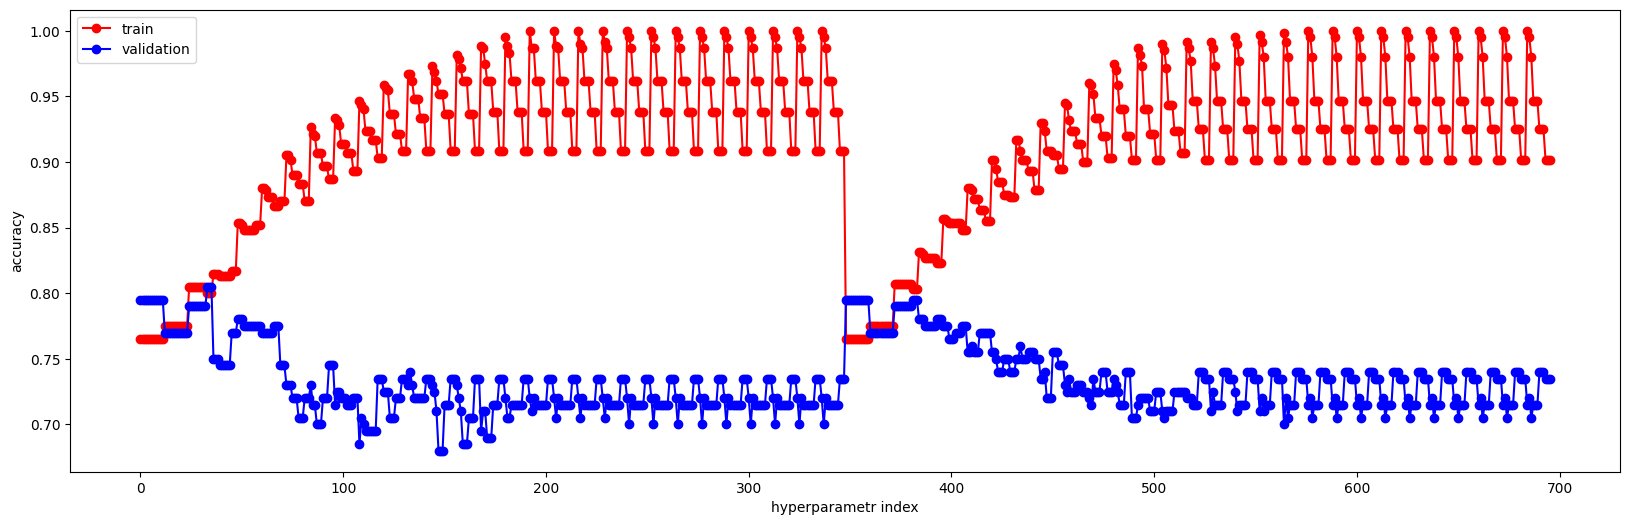

In [132]:
#visualise train/validation accuracy based on different parameters
plt.figure(figsize=(20,6))
plt.plot(DT_train_acc,'or-')
plt.plot(DT_val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

Choose best parameters and teach a decision tree based on them

In [139]:
best_parameters_DT = param_comb[np.argmax(DT_val_acc)]
clfDT = DecisionTreeClassifier(**best_parameters_DT)
clfDT.fit(Xtrain,ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clfDT.predict(Xtrain))))
print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clfDT.predict(Xval))))

accuracy score (train): 0.800000
accuracy score (val): 0.805000


Evaluating F1 score for best model:

In [134]:
from sklearn.metrics import f1_score
f1_DT = f1_score(ytest,clfDT.predict(Xtest))
print("F1 score for decision tree = ",f1_DT)

F1 score for decision tree =  0.7283236994219654


Prepare predicted probabilities to positive class for Decision tree:

In [157]:
DT_y_pred_proba = clfDT.predict_proba(Xtest)
DT_p1_hat = DT_y_pred_proba[:,1]

construct an ROC curve and evaluate AUC for Decision tree:

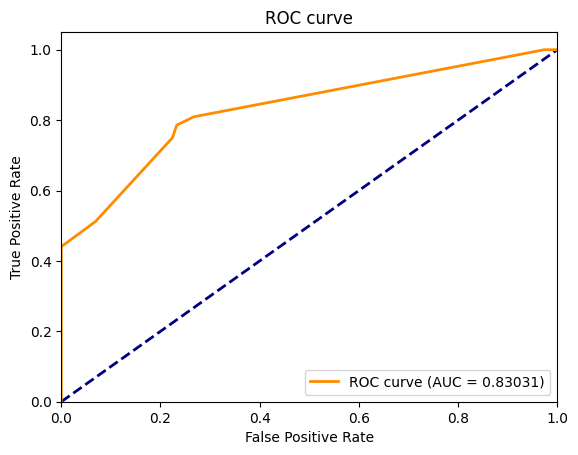

In [158]:
DTfpr, DTtpr, DTthresholds = metrics.roc_curve(ytest,DT_p1_hat)
AUC = metrics.roc_auc_score(ytest, DT_y_pred_proba[:,1])
plt.figure()
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.plot(DTfpr, DTtpr, color="darkorange", lw=2, label = f"ROC curve (AUC = {AUC:.5f})")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.show()

KNN Method:

In [142]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': range(1,15), 
    'algorithm': ['auto', 'brute', 'ball_tree', 'kd_tree'], 
    'metric' :  ['minkowski', 'euclidean', 'manhattan']
}
param_comb = ParameterGrid(param_grid)

In [146]:
KNN_train_acc = []
KNN_val_acc = []
#Trying to teach KNN for different parameters
for params in param_comb:
    clfKNN = KNeighborsClassifier(n_neighbors=params['n_neighbors'], algorithm=params['algorithm'], metric=params['metric'])
    clfKNN.fit(Xtrain, ytrain)
    KNN_train_acc.append(metrics.accuracy_score(ytrain, clfKNN.predict(Xtrain)))
    KNN_val_acc.append(metrics.accuracy_score(yval, clfKNN.predict(Xval)))

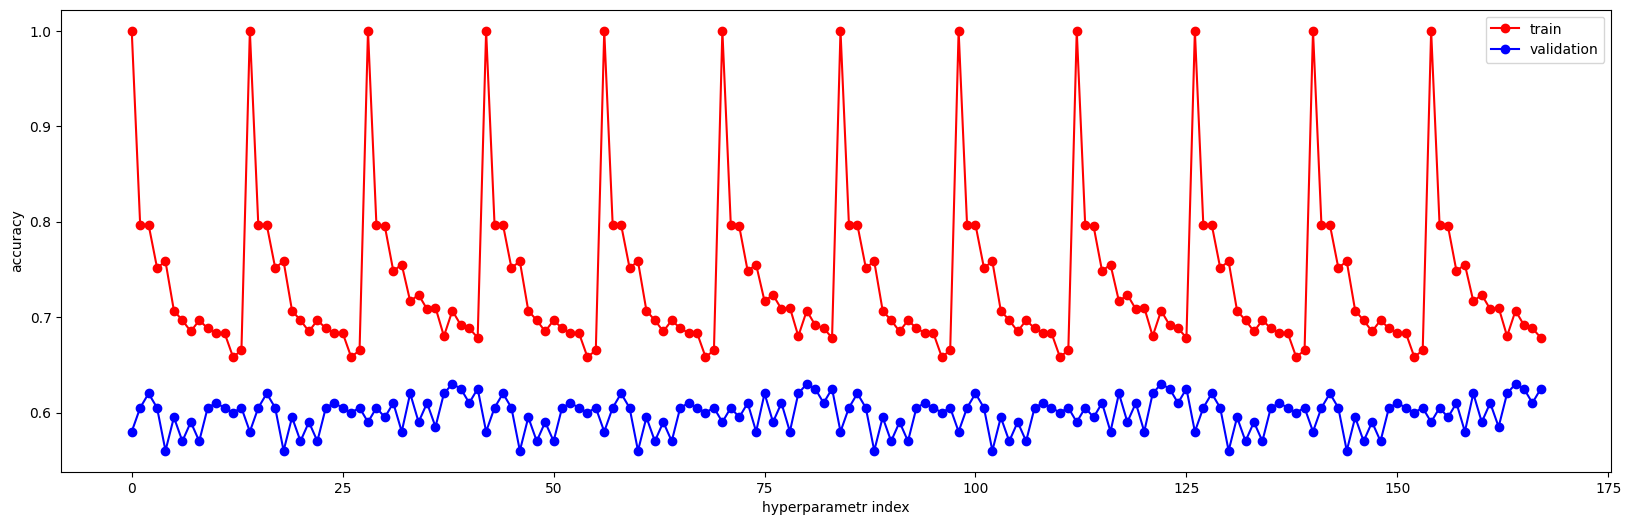

In [147]:
#visualise train/validation accuracy based on different parameters
plt.figure(figsize=(20,6))
plt.plot(KNN_train_acc,'or-')
plt.plot(KNN_val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

Choose best parameters and teach a KNN model based on them:

In [149]:
best_parameters_KNN = param_comb[np.argmax(KNN_val_acc)]
clfKNN = KNeighborsClassifier(**best_parameters_KNN)
clfKNN.fit(Xtrain,ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clfKNN.predict(Xtrain))))
print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clfKNN.predict(Xval))))

accuracy score (train): 0.706667
accuracy score (val): 0.630000


Evaluating F1 score for KNN method:

In [161]:
f1_KNN = f1_score(ytest,clfKNN.predict(Xtest))
print("F1 score for KNN = ",f1_KNN)

F1 score for KNN =  0.41269841269841273


Prepare predicted probabilities to positive class for KNN:

In [159]:
KNN_y_pred_proba = clfKNN.predict_proba(Xtest)
KNN_p1_hat = KNN_y_pred_proba[:,1]

construct an ROC curve and evaluate AUC for KNN:

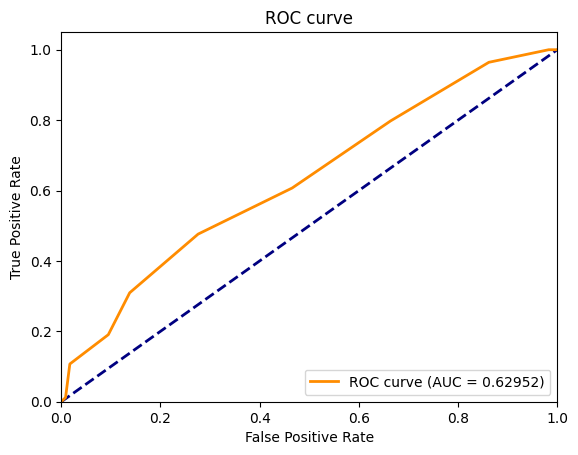

In [160]:
KNNfpr, KNNtpr, KNNthresholds = metrics.roc_curve(ytest,KNN_p1_hat)
AUC = metrics.roc_auc_score(ytest, KNN_y_pred_proba[:,1])
plt.figure()
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.plot(KNNfpr, KNNtpr, color="darkorange", lw=2, label = f"ROC curve (AUC = {AUC:.5f})")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.show()

As we can see, KNN method has worse validation accuracy score, F1 score, smaller AUC value, so we can conclude, that Decision tree model works better than KNN. For further steps I'll use Decision tree model

In [175]:
clf_final_mod = clfDT
clf_final_mod.fit(Xtrain,ytrain)
f1_final_mod = f1_DT



Evaluating Accuracy score and F1 score for final model:

In [181]:
print(f"Accuracy score for final model is: {accuracy_score(ytest, clf_final_mod.predict(Xtest))}")
print(f"F1 score for final model is: {f1_final_mod:.5}")

Accuracy score for final model is: 0.765
F1 score for final model is: 0.72832


Read data from evaluation.csv file and predicting passangers' survival using final model:

In [189]:
ev = pd.read_csv('evaluation.csv')
#replacing all missing values as NaN
ev = ev.replace('?', np.nan)
#ev.isnull().sum(axis=0)

make all object type columns as categories

In [190]:
object_cols = ev.select_dtypes(['object']).columns
ev[object_cols] = ev[object_cols].astype('category').apply(lambda x: x.cat.codes)
#check all types of dataframe
#ev.info()

filling NaN values for 'age' column with mean age value

In [199]:
#here we can see that columns "age" and "fare" have NaN values. NaN age values I'll fill later after splitting data on test, val and train. Missing "fare" value will be 0
ev.isnull().sum(axis=0)
ev.age=data.age.fillna(round(ev.age.mean()))
#Check if there're any remaining NaN values
data.isnull().sum()

ID           0
survived     0
pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
home.dest    0
dtype: int64

Predicting target values for dataset from evaluations.csv

In [232]:
yev=clf_final_mod.predict(ev)


put results of prediction into results.csv file:

In [257]:
results = pd.DataFrame({'ID': ev.ID, 'survived': yev}) 
display(results)
results.to_csv('results.csv', index=False)

,ID,survived
0,1000,0
1,1001,1
2,1002,1
3,1003,0
4,1004,1
...,...,...
304,1304,0
305,1305,0
306,1306,0
307,1307,0
